# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [140]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Notebook Presentation

In [4]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [5]:
data_path = "/content/drive/MyDrive/Python/day_76/apps.csv"

df_apps = pd.read_csv(data_path)

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [6]:
df_apps.describe()

,Rating,Reviews,Size_MBs
count,"9,367.00","10,841.00","10,841.00"
mean,4.19,"444,111.93",19.77
std,0.52,"2,927,628.66",21.40
min,1.00,0.00,0.01
25%,4.00,38.00,4.90
50%,4.30,"2,094.00",11.00
75%,4.50,"54,768.00",27.00
max,5.00,"78,158,306.00",100.00


In [7]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
4138,Permit Test Connecticut CT DMV,FAMILY,4.60,186,9.60,"10,000",Free,0,Everyone,Education,"October 12, 2017",4.1 and up
8177,Color by Number – New Coloring Book,GAME,4.70,141529,24.00,"5,000,000",Free,0,Everyone 10+,Board,"August 1, 2018",4.1 and up
4288,DIY Crafts Cds,LIFESTYLE,4.00,209,3.10,"50,000",Free,0,Everyone,Lifestyle,"January 24, 2017",3.0 and up
8991,Blur Image Background,PHOTOGRAPHY,3.90,129268,11.00,"10,000,000",Free,0,Everyone,Photography,"July 30, 2018",4.1 and up
7077,News24,NEWS_AND_MAGAZINES,4.10,30693,6.30,"1,000,000",Free,0,Everyone 10+,News & Magazines,"August 1, 2018",Varies with device


In [8]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

### Drop Unused Columns

**Challenge**: Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame. We will not use these columns.

In [9]:
df_apps.drop(columns=['Last_Updated', 'Android_Ver'], inplace=True)

In [10]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres'],
      dtype='object')

### Find and Remove NaN values in Ratings

**Challenge**: How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows.

In [12]:
df_apps.isna().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size_MBs,0
Installs,0
Type,1
Price,0
Content_Rating,0
Genres,0


In [43]:
new_df = df_apps.dropna()

In [44]:
new_df.isna().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size_MBs,0
Installs,0
Type,0
Price,0
Content_Rating,0
Genres,0


### Find and Remove Duplicates

**Challenge**: Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`.


In [45]:
new_df.duplicated().sum()

np.int64(476)

In [51]:
new_df.App.where(new_df.App == 'Facebook').count()

np.int64(2)

In [58]:
new_df.drop_duplicates(subset=['App'], inplace=True)

In [59]:
new_df.duplicated().sum()

np.int64(0)

In [60]:
new_df.App.where(new_df.App == 'Instagram').count()


np.int64(1)

# Find Highest Rated Apps

**Challenge**: Identify which apps are the highest rated. What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

**Ans. ** Theres a lot of high rated apps

In [61]:
new_df.sort_values(by='Rating', ascending=False).count()

,0
App,8197
Category,8197
Rating,8197
Reviews,8197
Size_MBs,8197
Installs,8197
Type,8197
Price,8197
Content_Rating,8197
Genres,8197


# Find 5 Largest Apps in terms of Size (MBs)

**Challenge**: What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please?

In [62]:
new_df.sort_values(by='Size_MBs', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10295,SimCity BuildIt,FAMILY,4.50,4218587,100.00,"50,000,000",Free,0,Everyone 10+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness
4176,Car Crash III Beam DH Real Damage Simulator 2018,GAME,3.60,151,100.00,"10,000",Free,0,Everyone,Racing
7926,Post Bank,FINANCE,4.50,60449,100.00,"1,000,000",Free,0,Everyone,Finance
8718,Mini Golf King - Multiplayer Game,GAME,4.50,531458,100.00,"5,000,000",Free,0,Everyone,Sports


# Find the 5 App with Most Reviews

**Challenge**: Which apps have the highest number of reviews? Are there any paid apps among the top 50?

In [64]:
new_df.sort_values(by="Reviews", ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy


# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [65]:
content_rating = new_df.Content_Rating.value_counts()
content_rating

,count
Content_Rating,
Everyone,6619
Teen,912
Mature 17+,357
Everyone 10+,305
Adults only 18+,3
Unrated,1


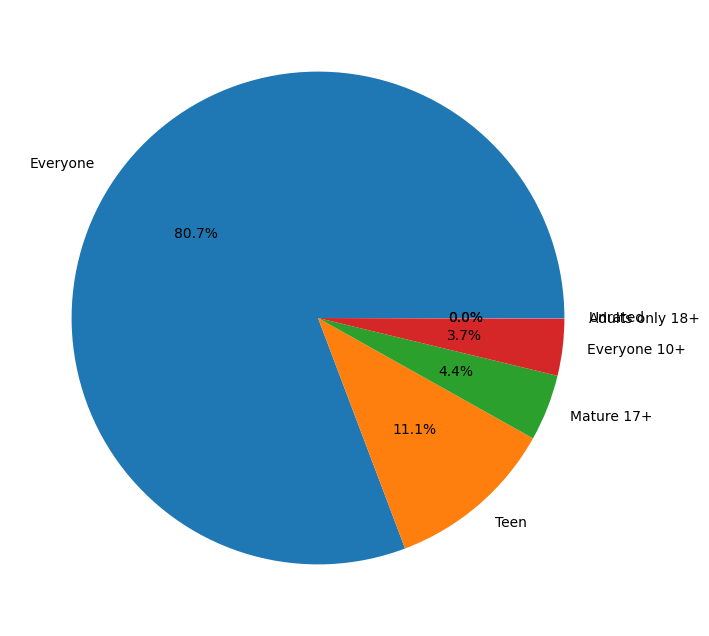

In [70]:
plt.figure(figsize=(8,8))
plt.pie(content_rating, labels=content_rating.index, autopct='%1.1f%%')
plt.show()

In [77]:
fig = px.pie(values=content_rating, names=content_rating.index)
fig.show()

# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install?

Check the datatype of the Installs column.

Count the number of apps at each level of installations.

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first.

In [79]:
new_df.Installs.dtype

dtype('O')

In [84]:
new_df.Installs = new_df.Installs.str.replace(',', '').str.replace('+', '')
new_df.Installs = pd.to_numeric(new_df.Installs)

AttributeError: Can only use .str accessor with string values!

# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


In [85]:
paid_apps = new_df.where(new_df.Price != '0')

In [87]:
paid_apps.dropna(inplace=True)

In [89]:
paid_apps.Price = paid_apps.Price.str.replace('$', '').astype(float)

In [91]:
paid_apps.Price.dtype

dtype('float64')

In [93]:
paid_apps = paid_apps.where(paid_apps.Price <= 250)

### The most expensive apps sub $250

In [95]:
paid_apps['Revenue_Estimate'] = paid_apps.Installs * paid_apps.Price
paid_apps.sort_values('Revenue_Estimate', ascending=False).head(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,"2,376,564.00",19.00,"10,000,000.00",Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,"408,292.00",29.00,"10,000,000.00",Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,"348,962.00",26.00,"1,000,000.00",Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,"49,553.00",48.00,"1,000,000.00",Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,"23,966.00",0.85,"1,000,000.00",Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,"87,766.00",12.00,"1,000,000.00",Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,"76,593.00",4.75,"500,000.00",Paid,5.99,Everyone,Weather,"2,995,000.00"
6856,Threema,COMMUNICATION,4.50,"51,110.00",3.50,"1,000,000.00",Paid,2.99,Everyone,Communication,"2,990,000.00"
7954,Bloons TD 5,FAMILY,4.60,"190,086.00",94.00,"1,000,000.00",Paid,2.99,Everyone,Strategy,"2,990,000.00"
7044,Tasker,TOOLS,4.60,"43,045.00",3.40,"1,000,000.00",Paid,2.99,Everyone,Tools,"2,990,000.00"


### Highest Grossing Paid Apps (ballpark estimate)

# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [96]:
new_df.Category.nunique()

33

In [97]:
new_df.Category.value_counts()

,count
Category,
FAMILY,1610
GAME,910
TOOLS,718
FINANCE,302
LIFESTYLE,302
PRODUCTIVITY,301
PERSONALIZATION,298
MEDICAL,291
PHOTOGRAPHY,263


In [100]:
fig = px.bar(x=new_df.Category.value_counts().head().index, y=new_df.Category.value_counts().head())
fig.show()

In [101]:
fig = px.scatter(x=new_df.Category.value_counts().head().index, y=new_df.Category.value_counts().head())
fig.show()

### Vertical Bar Chart - Highest Competition (Number of Apps)

In [ ]:
fig = px.bar(x=new_df.Category.value_counts().head().index, y=new_df.Category.value_counts().head())
fig.show()

### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [105]:
category_installs = new_df.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs.sort_values('Installs', ascending=True, inplace=True)

In [106]:
fig = px.bar(x=category_installs.Installs, y=category_installs.Installs.index, orientation='h')
fig.show()

### Category Concentration - Downloads vs. Competition

**Challenge**:
* First, create a DataFrame that has the number of apps in one column and the number of installs in another:

<img src=https://imgur.com/uQRSlXi.png width="350">

* Then use the [plotly express examples from the documentation](https://plotly.com/python/line-and-scatter/) alongside the [.scatter() API reference](https://plotly.com/python-api-reference/generated/plotly.express.scatter.html)to create scatter plot that looks like this.

<img src=https://imgur.com/cHsqh6a.png>

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log')

In [110]:
down_comp_data = new_df.groupby('Category').agg({'App': pd.Series.count, 'Installs': pd.Series.sum})
down_comp_data.sort_values('Installs', ascending=False, inplace=True)
down_comp_data

,App,Installs
Category,,
GAME,910,13858762717
COMMUNICATION,257,11039241530
TOOLS,718,7999724500
PRODUCTIVITY,301,5788070180
SOCIAL,203,5487841475
PHOTOGRAPHY,263,4649143130
FAMILY,1610,4437579590
VIDEO_PLAYERS,148,3916897200
TRAVEL_AND_LOCAL,187,2894859300


In [ ]:
# prompt: change the x title

fig = px.scatter(down_comp_data,
                 x="App",
                 y="Installs",
                 size="Installs",
                 hover_name=down_comp_data.index,
                 color="Installs")

fig.update_layout(xaxis_title="Number of Apps (Category)",
                  yaxis_title="Number of Installs",
                  yaxis=dict(type='log'))
fig.show()

In [117]:
fig = px.scatter(x=down_comp_data.App, y=down_comp_data.Installs, size=down_comp_data.App, hover_name=down_comp_data.index, color=down_comp_data.App)
fig.update_layout(yaxis=dict(type='log'), yaxis_title="Number of Installs", xaxis_title="Number of Apps (Category)")
fig.show()

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html).


In [124]:
new_df.Genres.nunique()

114

In [127]:
new_df.Genres.value_counts().sort_values(ascending=True)[:5]

,count
Genres,
Adventure;Education,1
Lifestyle;Pretend Play,1
Strategy;Education,1
Communication;Creativity,1
Music & Audio;Music & Video,1


In [129]:
gencount = new_df.Genres.str.split(';', expand=True).stack().value_counts()

# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data?

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/).

* Find a way to set the colour scale using the color_continuous_scale parameter.
* Find a way to make the color axis disappear by using coloraxis_showscale.

In [130]:
gencount.head()

,count
Tools,718
Education,587
Entertainment,502
Action,304
Lifestyle,303


In [136]:
fig = px.bar(x=gencount.index[:10], y=gencount[:10], color=gencount[:10], color_continuous_scale='agsunset')
fig.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [137]:
new_df.Type.value_counts()

,count
Type,
Free,7593
Paid,604


In [150]:
df_free_vs_paid = new_df.groupby(['Category', 'Type'], as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


In [151]:
df_free = df_free_vs_paid.where(df_free_vs_paid.Type == 'Free')
df_paid = df_free_vs_paid.where(df_free_vs_paid.Type == 'Paid')

In [153]:
df_free.dropna(inplace=True)
df_paid.dropna(inplace=True)

**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart:

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category.

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value).

In [157]:
fig = px.bar(df_free_vs_paid,
             x='Category',
             y='App',
             color='Type',
             barmode='group',
             category_orders={'Category': df_free_vs_paid.sort_values('App', ascending=False).Category}
             )

fig.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))

fig.show()

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart.

<img src=https://imgur.com/uVsECT3.png>


In [158]:
box = px.box(new_df,
             y='Installs',
             x='Type',
             color='Type',
             notched=True,
             points='all',
             title='How Many Downloads are Paid Apps Giving Up?')

box.update_layout(yaxis=dict(type='log'))

box.show()

# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below:

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories.

In [167]:
df_paid_apps = paid_apps[paid_apps['Type'] == 'Paid']

In [168]:
df_paid_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Revenue_Estimate'],
      dtype='object')

In [169]:
box = px.box(df_paid_apps,
             x='Category',
             y='Revenue_Estimate',
             title='How Much Can Paid Apps Earn?')

box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log'))


box.show()


# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.

In [170]:
box = px.box(df_paid_apps,
             x='Category',
             y="Price",
             title='Price per Category')

box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  xaxis={'categoryorder':'max descending'},
                  yaxis=dict(type='log'))

box.show()